In [69]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import numpy.core.multiarray
import sklearn

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core.multiarray failed to import

In [68]:
!pip install scikit-learn

### Get Proshares ETH ETF Price

In [45]:
eeth = yf.Ticker("EETH")
eeth_price = eeth.history(start="2023-11-01", end=None)
eeth_price.set_index(eeth_price.index.date, inplace=True)
eeth_price = eeth_price['Close']

### Get eethreum Price

In [46]:
eth = yf.Ticker("ETH-USD")
eth_price = eth.history(start="2023-11-01", end=None)
eth_price.set_index(eth_price.index.date, inplace=True)
eth_price = eth_price['Close'][eeth_price.index]

### Create Prices DF

In [47]:
df = pd.DataFrame({'eeth':eeth_price, 'eth':eth_price}, index=eth_price.index)

In [48]:
df['eth_returns'] = df['eth'].pct_change()
df['eeth_returns'] = df['eeth'].pct_change()

<Axes: >

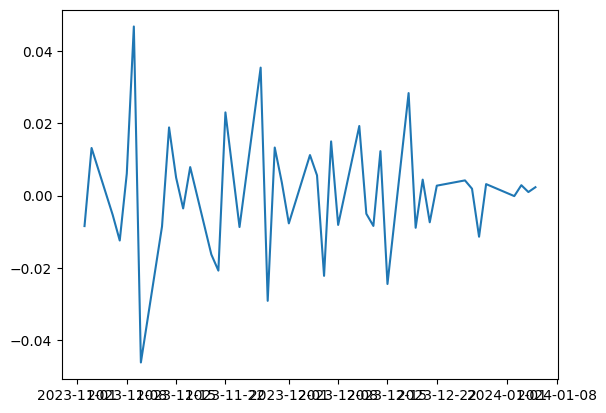

In [49]:
(df['eth_returns']-df['eeth_returns']).plot()

In [50]:
(1+np.sum(np.abs(df['eth_returns']-df['eeth_returns'])))*1000

1550.9111287145636

In [54]:
df.corr()

,eeth,eth,eth_returns,eeth_returns
eeth,1.000000,0.987047,0.146598,0.187679
eth,0.987047,1.000000,0.176063,0.162632
eth_returns,0.146598,0.176063,1.000000,0.895675
eeth_returns,0.187679,0.162632,0.895675,1.000000


In [55]:
# 98% correlation between eth and eeth
# 90% correlation between their returns

<Axes: >

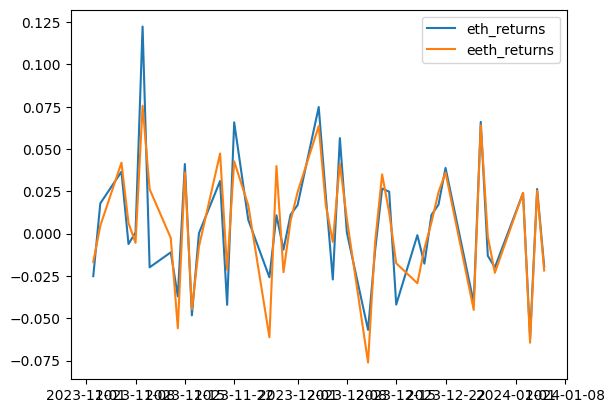

In [57]:
df[['eth_returns','eeth_returns']].plot()